In [10]:
from __future__ import division # using Python 2.7
import numpy as np
import pandas as pd 

%matplotlib inline

## Read In Data

In [19]:
?pd.read_fwf

In [64]:
f = 'data/grbm_-01-_L_.txt'

# Read a table of fixed-width formatted lines into DataFrame
# SKIP FIRST 4 ROWS. 

data = pd.read_fwf(f, header=0, skiprows=4)

data.head()

,prob,cstat,alpha,beta,enaught,norm
0,1.464804e-99,774.965035,-1.094847,-2.334929,607.719256,-1.724910
1,1.551436e-99,774.847617,-1.251852,-2.282142,1739.260013,-1.814916
2,1.600356e-99,774.783027,-1.222781,-2.692320,2722.137812,-1.883588
3,1.622601e-99,774.752918,-1.328367,-2.237835,1735.107763,-1.885350
4,1.778115e-99,774.567371,-1.174649,-2.390003,880.591390,-1.775047


```

```
## Band Function 


The modeling function used in this example to fit the GRB's data is known as the [Band Function](http://adsabs.harvard.edu/abs/1993ApJ...413..281B), which has become the *standard grb model*. Since we used the XSPEC function for the Importance Nested Sampling procedure, we refer you to the [XSPEC grbm function](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node179.html) for the function's equaton and parameter explanations. 

The characteristic energy ($E_c$), or rater $E_0$ if you check out the notation used by the authors who developed this function ([Band et al. 19993](http://adsabs.harvard.edu/abs/1993ApJ...413..281B)), is related to the more familiar $\nu F_{\nu}$ peak energy ($E_{pk}$) through the following equation:

\begin{equation}
E_0 = \frac{E_{pk}}{(\alpha + 2)} .
\end{equation}

Since many GRB correlations utilize the $E_{pk}$, we will convert all energies to it and name this parameter "epeak". 

In addition, the normalization ('norm') parameter is logged, so we will un-log those values. 

```

```


### Data Table Columns:
    ['prob', 'cstat', 'alpha', 'beta', 'epeak', 'norm']


* 'prob' stands for probability.
* $\text{cstat} = -2*\text{log_likelihood}$  from the Importance Nested Sampling procedure.
* 'alpha', 'beta', 'epeak', 'norm' are the spectral modeling parameters of the Band function. 

## Rename Column Headers

### Lets update the dataframe now

In [65]:
# replace 'enaught' with epeak values
data.loc[:, 'enaught'] = data.enaught*(data.alpha + 2.0)  # epeak = E0*(alpha+2.0)

# rename the column to 'epeak'
data.columns = data.columns.str.replace('enaught', 'epeak')
data.head()

,prob,cstat,alpha,beta,epeak,norm
0,1.464804e-99,774.965035,-1.094847,-2.334929,550.078935,-1.724910
1,1.551436e-99,774.847617,-1.251852,-2.282142,1301.223931,-1.814916
2,1.600356e-99,774.783027,-1.222781,-2.692320,2115.696039,-1.883588
3,1.622601e-99,774.752918,-1.328367,-2.237835,1165.356094,-1.885350
4,1.778115e-99,774.567371,-1.174649,-2.390003,726.796834,-1.775047


```


```
# Pandas Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118ad25d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118c140d0>]], dtype=object)

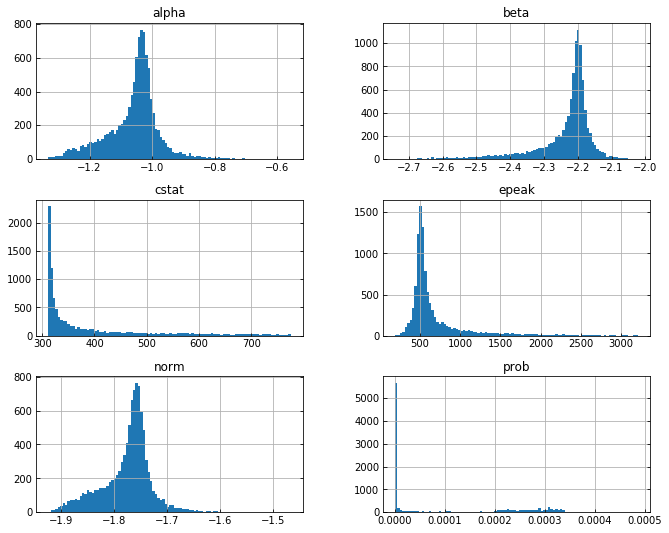

In [66]:
# HISTOGRAM - can do all at once.

data.hist(bins=100, figsize=(11,9))

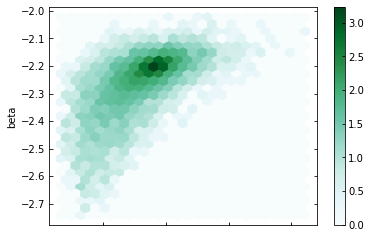

In [71]:
# HEXBIN

data.plot.hexbin(x='alpha',y='beta', bins='log', gridsize=25)

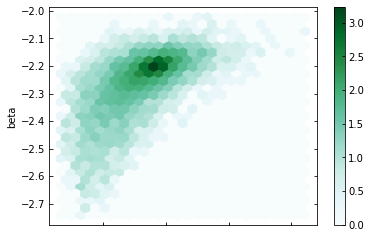

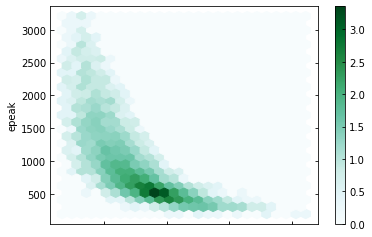

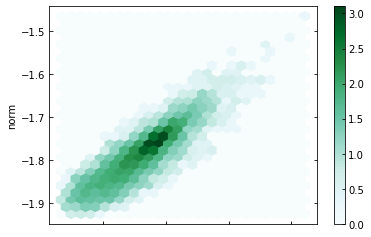

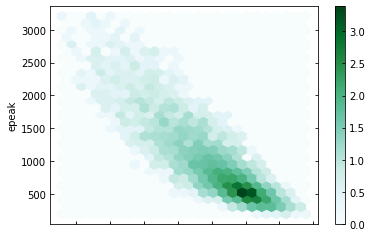

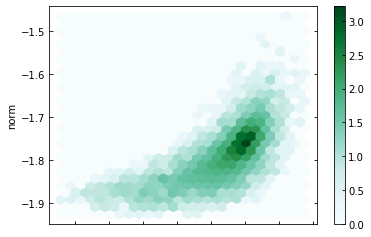

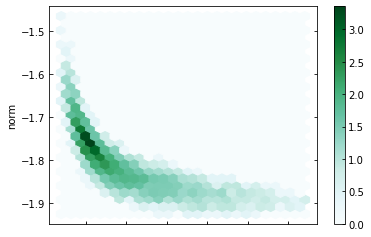

In [102]:
data_ = data.loc[:, 'alpha':'norm']

for i,icol in enumerate(data_.columns):
    for j,jcol in enumerate(data_.columns[i+1:]):
        data.plot.hexbin(x=icol,y=jcol, bins='log', gridsize=25)


In [ ]:
data_ = data.loc[:, 'alpha':'norm']

for i,icol in enumerate(data_.columns):
    for j,jcol in enumerate(data_.columns[i+1:]):
        data.plot.hexbin(x=icol,y=jcol, bins='log', gridsize=25)


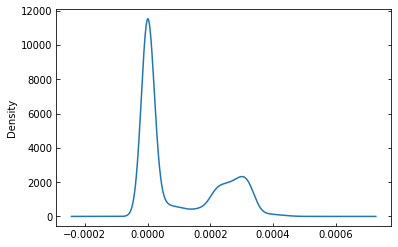

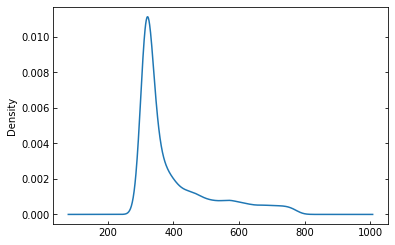

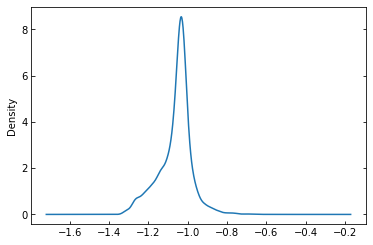

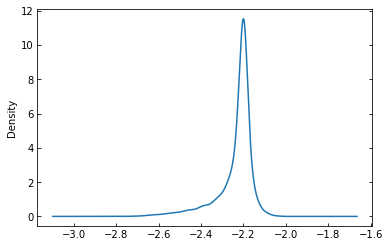

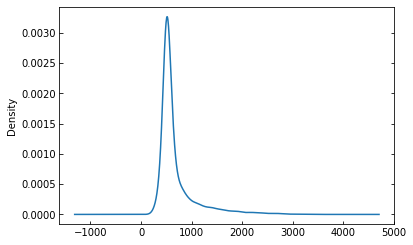

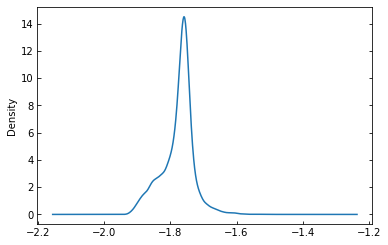

In [112]:
plt.clf()
for col in data.columns:
    eval('data.%s.plot.kde()'%col)
    plt.show()

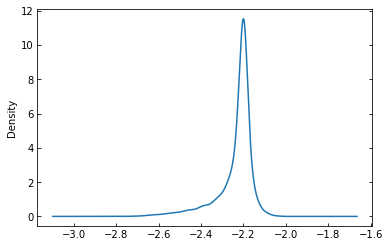

In [109]:
data.beta.plot.kde()

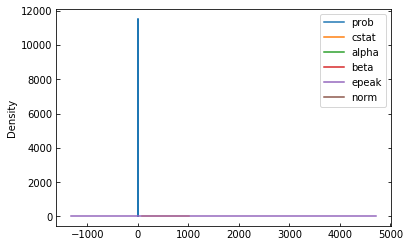

In [111]:

data.plot.density()

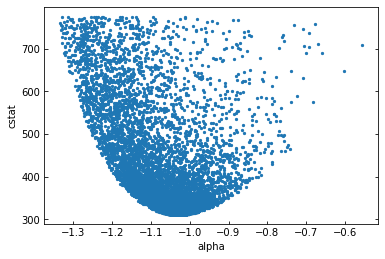

In [89]:
data.plot(kind='scatter', x='alpha', y='cstat', marker='.')

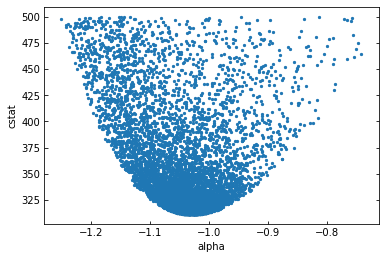

In [90]:
data.loc[data.cstat<500, :].plot(kind='scatter', 
                                 x='alpha', y='cstat', 
                                 marker='.')

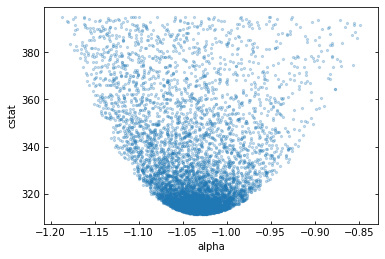

In [95]:
# data.cstat.mean() is 395
data.loc[data.cstat<data.cstat.mean(), :].plot(kind='scatter', 
                                 x='alpha', y='cstat', 
                                 marker='.', alpha=0.25)

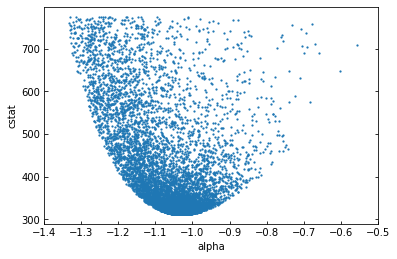

In [56]:
data.plot(kind='scatter', x='alpha', y='cstat', 
          marker='.', 
          lw=0,    # not specifically a scatter, so need lw = 0
          xlim=(-1.4, -0.5)) 

Text(0,0.5,u'cstat')

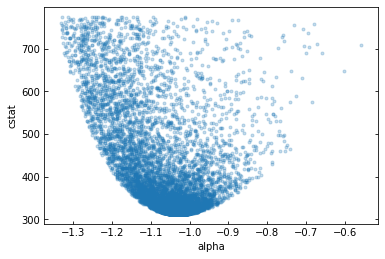

In [61]:
# in matplotlib

xvar = 'alpha'
yvar = 'cstat'

x = eval('data.%s'%xvar)
y = eval('data.%s'%yvar)
plt.scatter(x, y, marker='.', alpha=0.25)
plt.xlabel(xvar)
plt.ylabel(yvar)

Text(0,0.5,u'cstat')

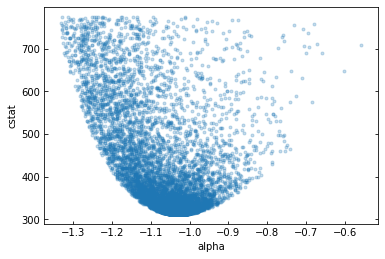

In [62]:
# in matplotlib

xvar = 'alpha'
yvar = 'cstat'

# row and column conditionals
# if all rows or cols desired, simply use ':'
# must be passed as strings.
row_cond = 'data.cstat>300' # cstats above 300
col_cond = ':'              # all columns

x = eval('data.loc[%s, %s].%s'%(row_cond, col_cond, xvar))
y = eval('data.loc[%s, %s].%s'%(row_cond, col_cond, yvar))
plt.scatter(x, y, marker='.', alpha=0.25)
plt.xlabel(xvar)
plt.ylabel(yvar)

Text(0,0.5,u'cstat')

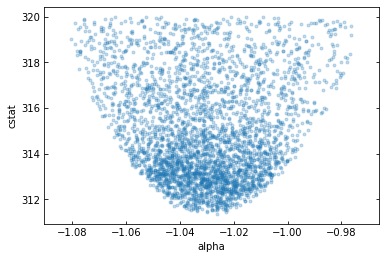

In [71]:
# in matplotlib

xvar = 'alpha'
yvar = 'cstat'

# row and column conditionals
# if all rows or cols desired, simply use ':'
# must be passed as strings.
row_cond = 'data.cstat<320' # cstats < 320
col_cond = ':'              # all columns

x = eval('data.loc[%s, %s].%s'%(row_cond, col_cond, xvar))
y = eval('data.loc[%s, %s].%s'%(row_cond, col_cond, yvar))
plt.scatter(x, y, marker='.', alpha=0.25)
plt.xlabel(xvar)
plt.ylabel(yvar)

In [72]:
x.shape # 3380 have cstats < 320.

(3380,)

In [74]:
len(x)/len(data) # 33%

0.3282828282828283

Text(0,0.5,u'cstat')

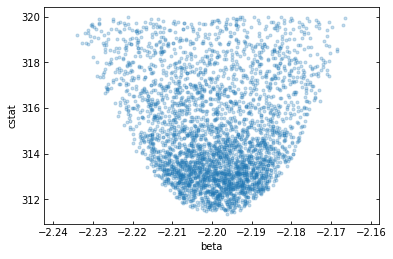

In [75]:
# in matplotlib

xvar = 'beta'
yvar = 'cstat'

# row and column conditionals
# if all rows or cols desired, simply use ':'
# must be passed as strings.
row_cond = 'data.cstat<320' # cstats < 320
col_cond = ':'              # all columns

x = eval('data.loc[%s, %s].%s'%(row_cond, col_cond, xvar))
y = eval('data.loc[%s, %s].%s'%(row_cond, col_cond, yvar))
plt.scatter(x, y, marker='.', alpha=0.25)
plt.xlabel(xvar)
plt.ylabel(yvar)

In [81]:
data.loc[:, 'norm'] = np.log10(data.loc[:, 'norm'])


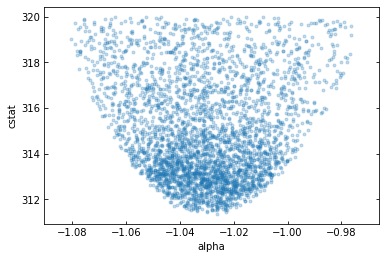

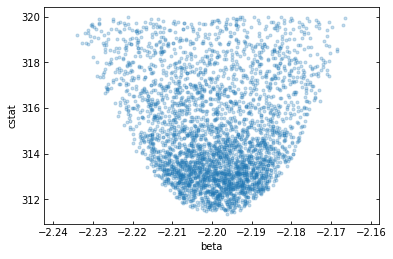

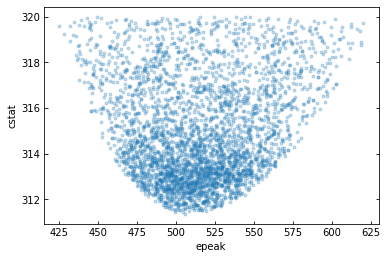

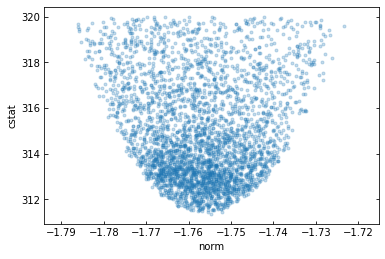

In [82]:
# in matplotlib

plt.clf()
for col in data.columns[2:]:
    xvar = col
    yvar = 'cstat'

    # row and column conditionals
    # if all rows or cols desired, simply use ':'
    # must be passed as strings.
    row_cond = 'data.cstat<320' # cstats < 320
    col_cond = ':'              # all columns

    x = eval('data.loc[%s, %s].%s'%(row_cond, col_cond, xvar))
    y = eval('data.loc[%s, %s].%s'%(row_cond, col_cond, yvar))
    plt.scatter(x, y, marker='.', alpha=0.25)
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.show()

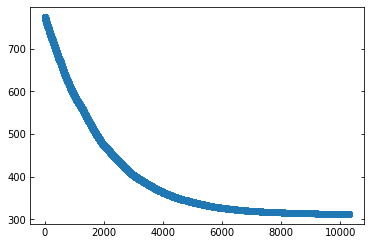

In [28]:

x = np.arange(1, len(data.cstat)+1, 1)
y = data.cstat
plt.scatter(x,y)



In [ ]:

x = np.arange(1, len(data.cstat)+1, 1)
y = data.cstat
plt.scatter(x,y)


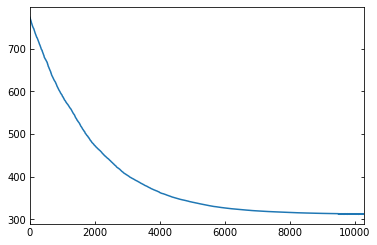

In [10]:
data.cstat.plot()

In [27]:
data.plot(kind='scatter')

ValueError: scatter requires and x and y column

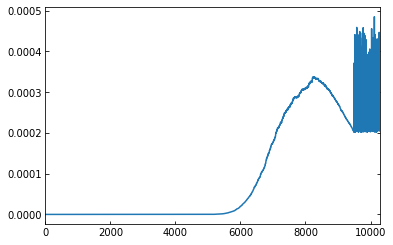

In [11]:
data.prob.plot()

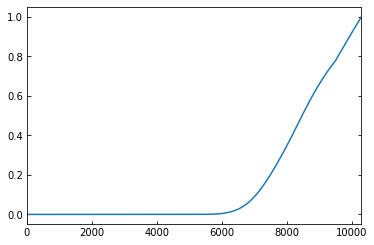

In [12]:
data.prob.cumsum().plot()

In [17]:
data.shape

(10296, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1142dd210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114666890>]], dtype=object)

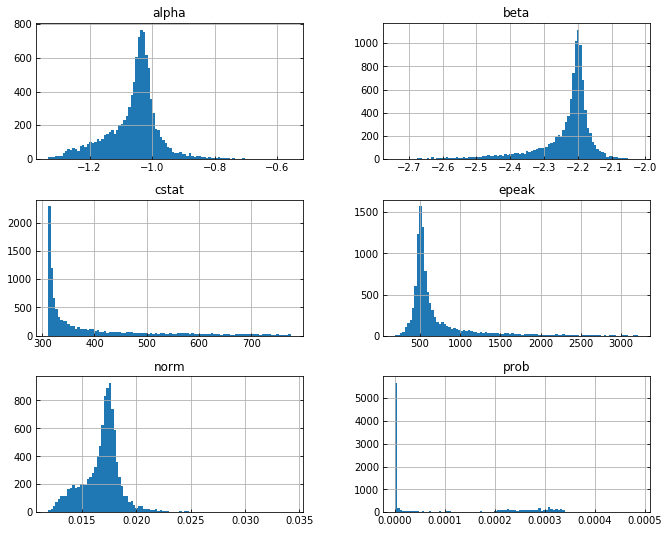

In [22]:
data.hist(bins=100, figsize=(11,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114790fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11658a0d0>]], dtype=object)

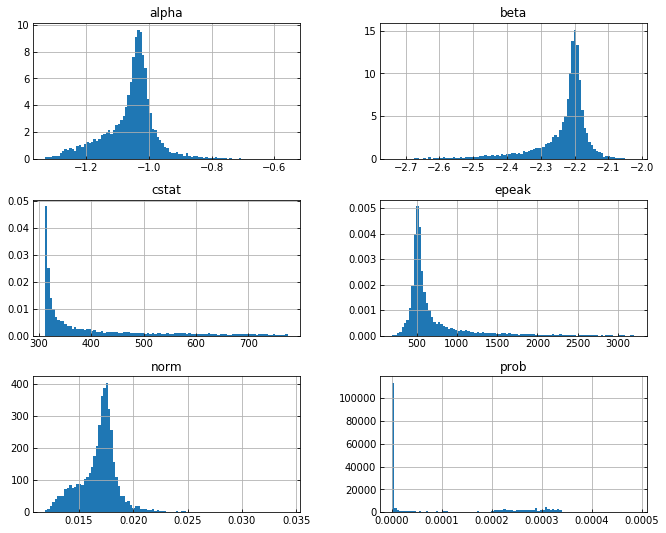

In [23]:
data.hist(bins=100, figsize=(11,9), normed=True)

### Grab the first 3000 rows of data (with the lowest Cstats) 
The method we use is called slicing. 

In [ ]:
data.loc[:3000, :].cstat.plot()

In [ ]:
data2 = data[:3000] # slicing

In [ ]:
data.shape

In [ ]:
data2.shape

In [ ]:
data2.columns

__Original plot of data, alpha parameter vs beta parameter. This includes all 13405 of the nested sampling results.__

In [ ]:
xvar = 'alpha'
yvar = 'beta'

x = eval('data.%s'%xvar)
y = eval('data.%s'%yvar)

plt.plot(x, y, 'x')
plt.xlabel(xvar)
plt.ylabel(yvar)
plt.show()

__Plot of 3000 best CStats values from nesting sampling results. alpha parameter vs beta parameter.__

In [ ]:
xvar = 'alpha'
yvar = 'beta'

x = eval('data2.%s'%xvar)
y = eval('data2.%s'%yvar)

plt.plot(x, y, 'x')
plt.xlabel(xvar)
plt.ylabel(yvar)
plt.show()

__Same plot in pandas:__

In [ ]:
xvar = 'alpha'
yvar = 'beta'
data2.plot(xvar, yvar, kind='scatter', marker='x', s=40, lw=0.75)

In [ ]:
?plt.scatter

In [ ]:
data2.hist(figsize=(10,6))

In [ ]:
import pandas.plotting.scatter_matrix as sc_mat


In [ ]:
x = data3[4] # beta
y = data3[2] # alpha

plt.plot(x, y, 'x')
plt.xlabel('ebreak')
plt.ylabel('alpha')
plt.show()

In [ ]:
data4 = data3

In [ ]:
data4.columns = 'prob cstat alpha beta ebreak norm_b plidx norm_p'.split()

In [ ]:
data4.columns

In [ ]:
data4[:5]

In [ ]:
data3[:5]

### You should notice that data3 column names also changed because data4 is a copy of it.  
Now we will check to see if the origianl dataframe, data1, changed as well.

In [ ]:
data1[:2], data2[:2]

Neither of these changed, so it is only the last assignment that changes.

In [ ]:
data3.plot.hexbin(x='ebreak', y='alpha', gridsize=50)

In [ ]:
data3.plot.hexbin(x='beta', y='alpha', gridsize=50)

'A useful keyword argument is gridsize; it controls the number of hexagons in the x-direction, and defaults to 100. A larger gridsize means more, smaller bins.

By default, a histogram of the counts around each (x, y) point is computed. You can specify alternative aggregations by passing values to the C and reduce_C_function arguments. C specifies the value at each (x, y) point and reduce_C_function is a function of one argument that reduces all the values in a bin to a single number (e.g. mean, max, sum, std). In this example the positions are given by columns a and b, while the value is given by column z. The bins are aggregated with numpy’s max function.'

http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [ ]:
data2.plot.hexbin(x='beta', y='alpha', C='cstat', gridsize=50)# reduce_C_function=np.mean, gridsize=50)

In [ ]:
help(data2.plot.hexbin)

In [ ]:
data2.plot.hexbin(x='beta', y='alpha', C='cstat', gridsize=50)# reduce_C_function=np.mean, gridsize=50)

In the above example, my cstat values and colors are reversed from what I want them to be.  Ther darker values favors maximum numbers.  So I decided to use those numbers to solve for the log-likelihood values.  cstat = -2*loglikelihood.  So I made a column in the dataframe called loglike and gave it the values of cstat/-2.  This way the larger numbers, still darker in color, are now the most favorable values instead of the least favorable.

In [ ]:
data2['loglike'] = data2['cstat']/-2.

In [ ]:
data2.plot.hexbin(x='beta', y='alpha', C='loglike', gridsize=50)# reduce_C_function=np.mean, gridsize=50)

The maximum likelihood values are those with the lowest cstat values, on line 6193 of the original datafile and now the first line of our dataset.  Going back to the dataset that is sorted by cstat but not truncated is data2.

In [ ]:
data2['loglike'][6181] # apparently this one uses the index value instead of row number, which is confusing.

What is the point (beta, alpha) at the maximum likelihood value?

data2['loglike'][6192]

In [ ]:
x_p = data2['beta'][6192]
y_p = data2['alpha'][6192]

In [ ]:
(x_p, y_p)

In [ ]:
help(plt.plot)

Since panda's plotting package is built off of matplotlib, matplotlib plotting commands will plot over pandas.

Panda's plotting package is called Visualization.  http://pandas.pydata.org/pandas-docs/stable/visualization.html
It's style is 'ggplot', which is the name of the widely used plotting package in R.

In [ ]:
data2.plot.hexbin(x='beta', y='alpha', C='loglike', gridsize=50)# reduce_C_function=np.mean, gridsize=50)
plt.plot(x_p, y_p, '+', color='white', markeredgewidth = 2, markersize=12)